## train the knn model without considering imbalance in the dataset

In [1]:
 import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



import warnings
# remove all warnings
warnings.filterwarnings("ignore")




# Load the dataset
df1 = pd.read_csv('dataset.csv')
df = df1.drop(['customer_id'], axis=1)


# Handling missing values
#imputer = SimpleImputer(strategy='mean')
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# replace % and ? with null in the country column 
df['country'].replace(['?', '%'], pd.NA, inplace=True)

# Drop rows with missing
print(df.isna().sum())
df.dropna(inplace=True)




#one-hot encoding 
categorical_columns = ['country', 'gender']
df = pd.get_dummies(df, columns=categorical_columns)

display(df)

# Separate features and target  
X = df.drop('churn (Churn Status)', axis=1) 
y = df['churn (Churn Status)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



credit_score                                                           0
country                                                               17
gender                                                                 0
age                                                                    0
tenure (From how many years he/she is having bank acc in ABC Bank)     0
Account balance                                                        2
products_number (Number of Product from bank)                          0
credit_card (Is this customer have credit card ?)                      0
active_member (Is he/she is active Member of bank ?)                   0
estimated_salary                                                       3
churn (Churn Status)                                                   0
dtype: int64


,credit_score,age,tenure (From how many years he/she is having bank acc in ABC Bank),Account balance,products_number (Number of Product from bank),credit_card (Is this customer have credit card ?),active_member (Is he/she is active Member of bank ?),estimated_salary,churn (Churn Status),country_France,country_Germany,country_Spain,gender_Female,gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,764,38,4,113607.47,1,1,0,91094.46,0,0,0,1,0,1
10002,678,41,2,148088.11,1,1,0,14083.12,0,1,0,0,0,1
10003,751,48,4,0.00,1,0,1,30165.06,1,1,0,0,1,0
10004,670,33,8,126679.69,1,1,1,39451.09,0,1,0,0,0,1


In [2]:

import numpy as np

#list of k values and distance metrics
k_values = np.arange(1,41)
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# a ictionary to store combinations and their accuracy
results = {}

# Iterate over each combination of k value and metric
for k in k_values:
    for metric in metrics:
       
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the combination and its accuracy in the results dictionary
        results[(k, metric)] = accuracy

# Find the combination with the highest accuracy
best_combination = max(results, key=results.get)
best_accuracy = results[best_combination]

# best combination and its corresponding accuracy
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)



Best Combination: (18, 'euclidean')
Best Accuracy: 0.8312468703054582


In [3]:
euclidean=[]
manhattan=[]
chebyshev=[]
minkowski=[]
for k in k_values:
    e = results[(k, 'euclidean')]
    m = results[(k, 'manhattan')]
    c = results[(k, 'chebyshev')]
    mi = results[(k, 'minkowski')]
       
    euclidean.append(e)
    manhattan.append(m)
    chebyshev.append(c)
    minkowski.append(mi)

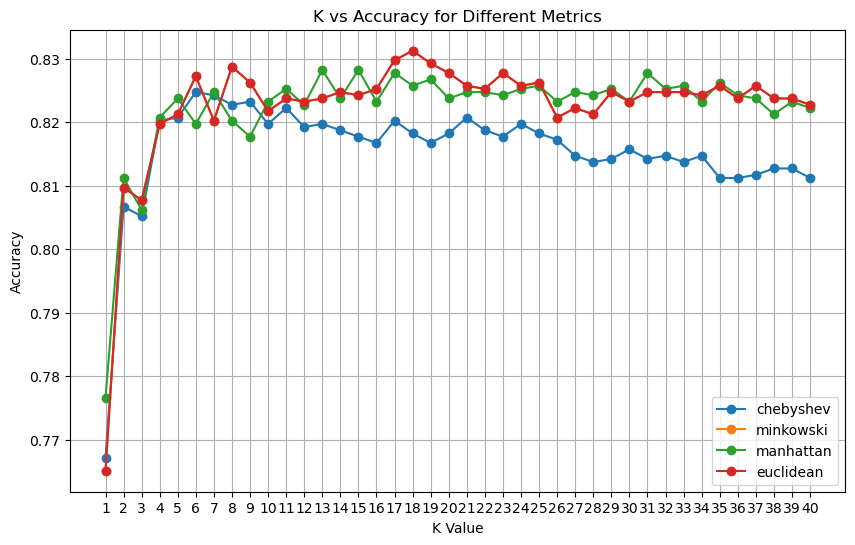

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,chebyshev, label='chebyshev',marker='o')
plt.plot(k_values,minkowski,label='minkowski',marker='o')
plt.plot(k_values,manhattan,label='manhattan',marker='o')
plt.plot(k_values,euclidean,label='euclidean',marker='o')
plt.xticks(k_values)
plt.title('K vs Accuracy for Different Metrics')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


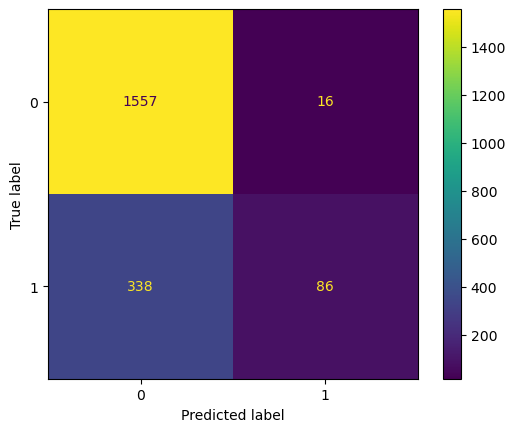


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1573
           1       0.84      0.20      0.33       424

    accuracy                           0.82      1997
   macro avg       0.83      0.60      0.61      1997
weighted avg       0.83      0.82      0.78      1997



In [5]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix



# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)


## train with stratifieldKFold

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': np.arange(10,15),  
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] 
}


knn = KNeighborsClassifier()

# k-fold cross-validation splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, scoring='recall')


grid_search.fit(X_train_scaled, y_train)

# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Score: 0.3091052439282349


In [7]:
best_k = best_params['n_neighbors']
best_metric = best_params['metric']
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Fit the model on the training data
best_knn.fit(X_train_scaled, y_train)

# Optionally, make predictions on the test data
y_pred = best_knn.predict(X_test_scaled)

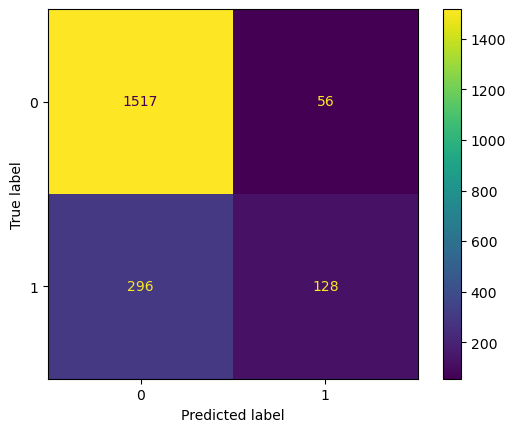


 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1573
           1       0.70      0.30      0.42       424

    accuracy                           0.82      1997
   macro avg       0.77      0.63      0.66      1997
weighted avg       0.81      0.82      0.80      1997



In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix



# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)

## under sampling

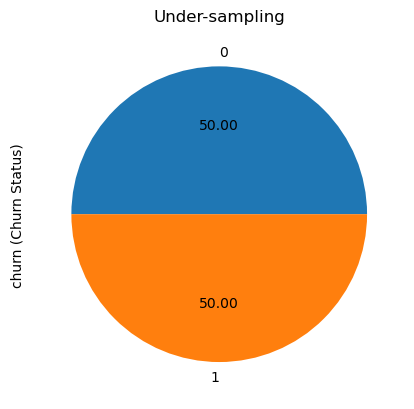

In [9]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train_scaled, y_train)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
     

In [10]:
X_res.shape

(3222, 13)

In [11]:
y_res.value_counts()

0    1611
1    1611
Name: churn (Churn Status), dtype: int64

In [12]:
#list of k values and distance metrics
k_values = np.arange(1,10)
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# a dictionary to store combinations and their accuracy
results = {}

# Iterate over each combination of k value and metric
for k in k_values:
    for metric in metrics:
       
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_res, y_res)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the combination and its accuracy in the results dictionary
        results[(k, metric)] = accuracy

# Find the combination with the highest accuracy
best_combination = max(results, key=results.get)
best_accuracy = results[best_combination]

# best combination and its corresponding accuracy
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)



Best Combination: (4, 'chebyshev')
Best Accuracy: 0.7811717576364546


In [13]:
euclidean=[]
manhattan=[]
chebyshev=[]
minkowski=[]
for k in k_values:
    e = results[(k, 'euclidean')]
    m = results[(k, 'manhattan')]
    c = results[(k, 'chebyshev')]
    mi = results[(k, 'minkowski')]
       
    euclidean.append(e)
    manhattan.append(m)
    chebyshev.append(c)
    minkowski.append(mi)

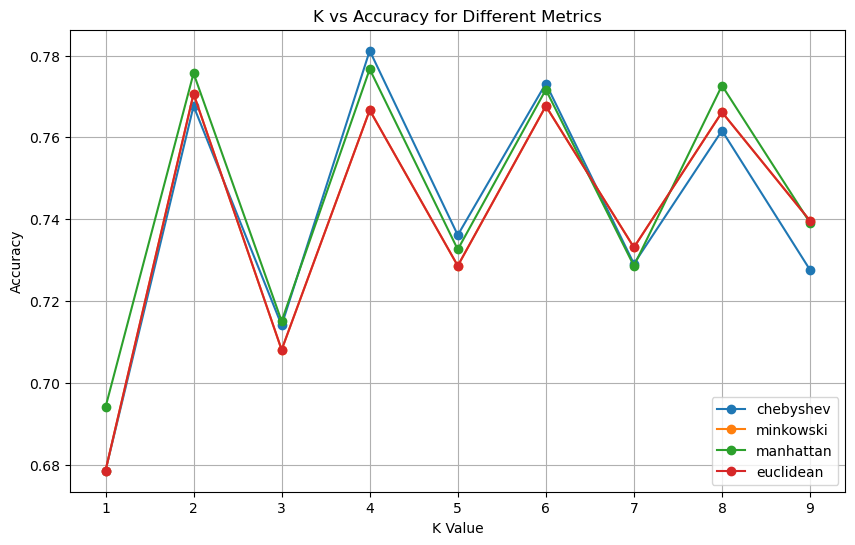

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,chebyshev, label='chebyshev',marker='o')
plt.plot(k_values,minkowski,label='minkowski',marker='o')
plt.plot(k_values,manhattan,label='manhattan',marker='o')
plt.plot(k_values,euclidean,label='euclidean',marker='o')
plt.xticks(k_values)
plt.title('K vs Accuracy for Different Metrics')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
best_k = best_combination[0]
best_metric = best_combination[1]
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Fit the model on the training data
best_knn.fit(X_res, y_res)


y_pred = best_knn.predict(X_test_scaled)


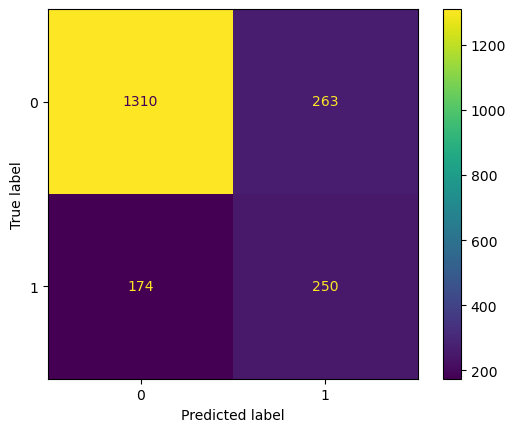


 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1573
           1       0.49      0.59      0.53       424

    accuracy                           0.78      1997
   macro avg       0.69      0.71      0.70      1997
weighted avg       0.80      0.78      0.79      1997



In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)


## with cross validation

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'n_neighbors': np.arange(1,40),  
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] 
}


knn = KNeighborsClassifier()

# k-fold cross-validation splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, scoring='accuracy')


grid_search.fit(X_res, y_res)

# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11}
Best Score: 0.7371260051037604


In [19]:
best_k = best_params['n_neighbors']
best_metric = best_params['metric']
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)


best_knn.fit(X_res, y_res)


y_pred = best_knn.predict(X_test_scaled)

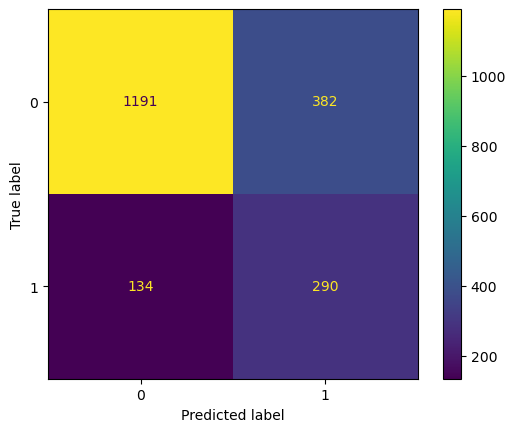


 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1573
           1       0.43      0.68      0.53       424

    accuracy                           0.74      1997
   macro avg       0.67      0.72      0.68      1997
weighted avg       0.80      0.74      0.76      1997



In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix



# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)


## over sampling

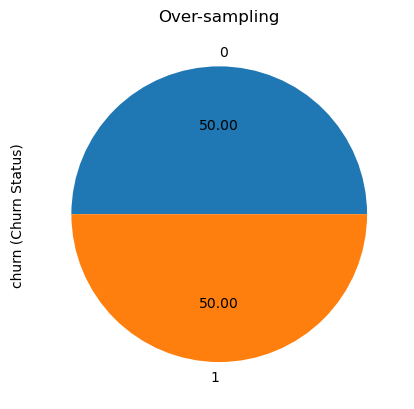

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote =SMOTE()
X_res_o, y_res_o =smote.fit_resample(X_train, y_train)

# ros = RandomOverSampler(sampling_strategy=1) # Float
# ros = RandomOverSampler(sampling_strategy="not majority") # String
# X_res_o, y_res_o = ros.fit_resample(X_train_scaled, y_train)

ax = y_res_o.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [22]:
# standardization
scaler = StandardScaler()
X_res_o = scaler.fit_transform(X_res_o)


In [23]:
#list of k values and distance metrics
k_values = np.arange(10,41)
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# a dictionary to store combinations and their accuracy
results = {}

# Iterate over each combination of k value and metric
for k in k_values:
    for metric in metrics:
       
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_res_o, y_res_o)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the combination and its accuracy in the results dictionary
        results[(k, metric)] = accuracy

# Find the combination with the highest accuracy
best_combination = max(results, key=results.get)
best_accuracy = results[best_combination]

# best combination and its corresponding accuracy
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)


Best Combination: (10, 'euclidean')
Best Accuracy: 0.8082123184777166


In [24]:
euclidean=[]
manhattan=[]
chebyshev=[]
minkowski=[]
for k in k_values:
    e = results[(k, 'euclidean')]
    m = results[(k, 'manhattan')]
    c = results[(k, 'chebyshev')]
    mi = results[(k, 'minkowski')]
       
    euclidean.append(e)
    manhattan.append(m)
    chebyshev.append(c)
    minkowski.append(mi)

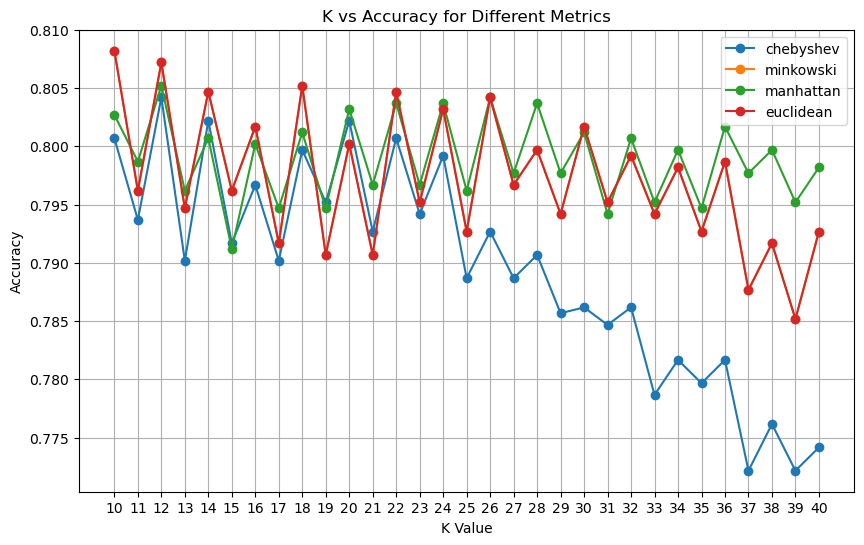

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,chebyshev, label='chebyshev',marker='o')
plt.plot(k_values,minkowski,label='minkowski',marker='o')
plt.plot(k_values,manhattan,label='manhattan',marker='o')
plt.plot(k_values,euclidean,label='euclidean',marker='o')
plt.xticks(k_values)
plt.title('K vs Accuracy for Different Metrics')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
best_k = best_combination[0]
best_metric = best_combination[1]
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

best_knn.fit(X_res_o, y_res_o)

y_pred = best_knn.predict(X_test_scaled)

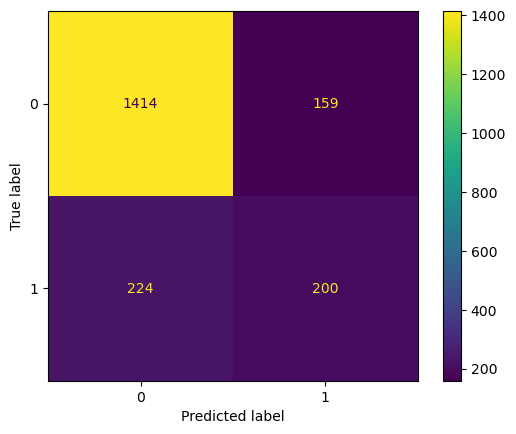


 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1573
           1       0.56      0.47      0.51       424

    accuracy                           0.81      1997
   macro avg       0.71      0.69      0.70      1997
weighted avg       0.80      0.81      0.80      1997



In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)

## with cross validation

In [28]:

param_grid = {
    'n_neighbors': np.arange(1,40),  
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'] 
}


knn = KNeighborsClassifier()


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, scoring='accuracy')


grid_search.fit(X_res_o, y_res_o)

# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best Score: 0.8742162166316938


In [29]:
best_k = best_params['n_neighbors']
best_metric = best_params['metric']
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Fit the model on the training data
best_knn.fit(X_res_o, y_res_o)


y_pred = best_knn.predict(X_test_scaled)

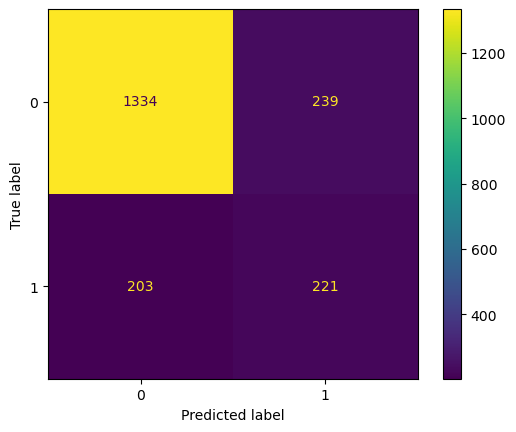


 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1573
           1       0.48      0.52      0.50       424

    accuracy                           0.78      1997
   macro avg       0.67      0.68      0.68      1997
weighted avg       0.79      0.78      0.78      1997



In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_matrix)
cm_display.plot()
plt.show()

# Classification report
classification = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(classification)